In [1]:
import cv2 
import matplotlib.pyplot as plt

In [2]:
def pdf2text(path):
    """
    path - путь к файлу pdf
    файл преобразуется в изображение, изображение преобразуется в текст
    возвращает список строк документа
    """
    img = p2i.convert_from_path(path, fmt='png')
    image = np.array(img[0])
    preprocess = "thresh"
    # загрузить образ и преобразовать его в оттенки серого
    #image = cv2.imread('image.png') # image - numpy-array of pixels
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # проверим, следует ли применять пороговое значение для предварительной обработки изображения
    if preprocess == "thresh":
        gray = cv2.threshold(gray, 0, 255,
            cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # если нужно медианное размытие, чтобы удалить шум
    elif preprocess == "blur":
        gray = cv2.medianBlur(gray, 3)
    # сохраним временную картинку в оттенках серого, чтобы можно было применить к ней OCR
    filename = "{}.png".format(os.getpid())
    cv2.imwrite(filename, gray)
    # загрузка изображения в виде объекта image Pillow, применение OCR, а затем удаление временного файла
    text = pytesseract.image_to_string(Image.open(filename), lang='rus') #to_data
    os.remove(filename)
    return text.split(sep='\n')

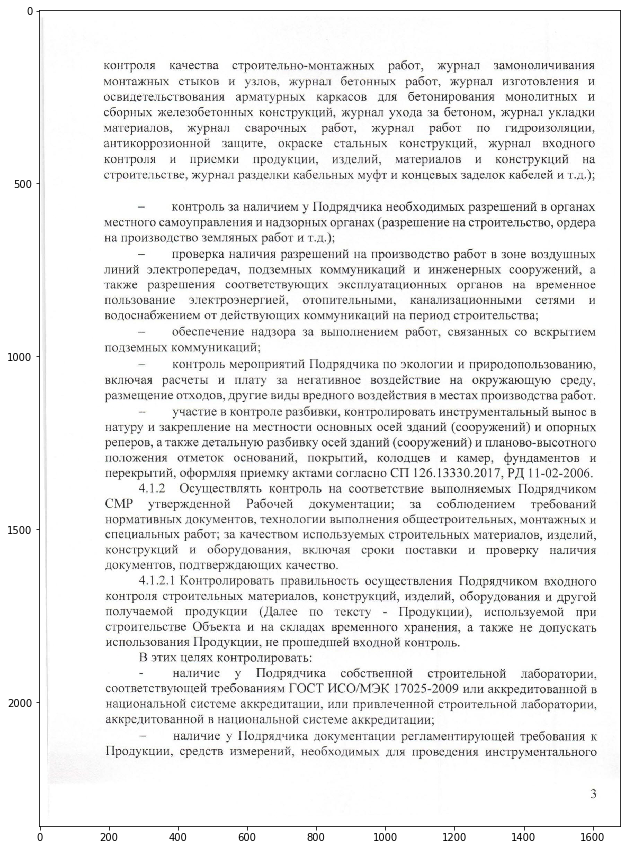

In [14]:
img = cv2.imread("/home/padre/data/claw_data/images/0112.jpeg")
plt.figure(figsize=(15, 15))
plt.imshow(img[:, :, ::-1])
plt.show()

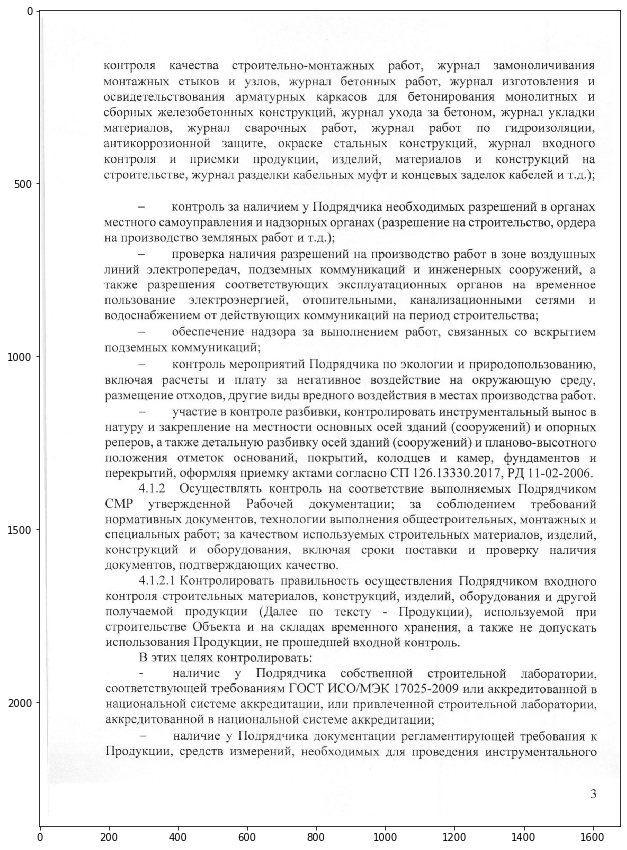

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15, 15))
plt.imshow(gray, cmap='gray')
plt.show()

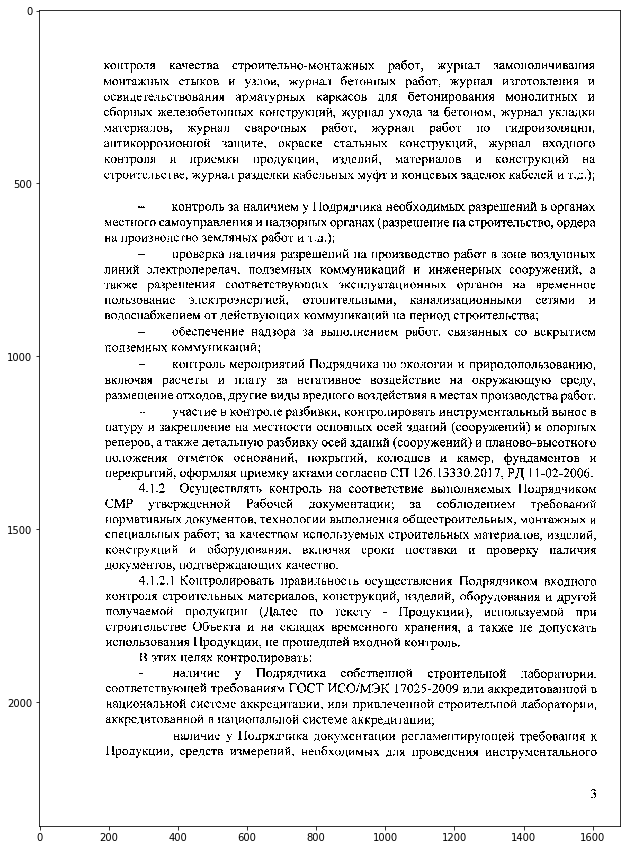

In [16]:
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.figure(figsize=(15, 15))
plt.imshow(gray, cmap='gray')
plt.show()

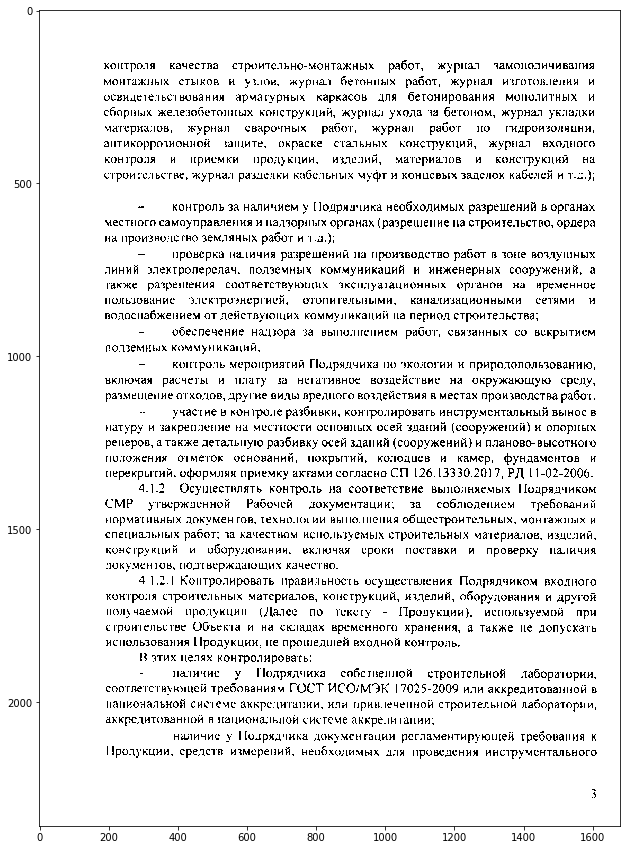

In [18]:
gray = cv2.medianBlur(gray, 3)
plt.figure(figsize=(15, 15))
plt.imshow(gray, cmap='gray')



In [20]:
plt.imsave("/tmp/afterBlur.jpg", gray, cmap='gray')

In [22]:
import pytesseract
pytesseract.image_to_string(gray, lang='rus')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


'контроля качества строительно-монтажных работ, журнал замоноличивания\nмонтажных стыков и узлов, журнал бетонных работ, журнал изготовления и\nосвидетельствования арматурных каркасов для бетонирования монолитных и\nсборных железобетонных конструкций, журнал ухода за бетоном, журнал укладки\nматериалов, журнал сварочных работ, журнал работ по гидроизоляции,\nантикоррозионной защите, окраске стальных конструкций, журнал входного\nконтроля и приемки продукции, изделий, материалов и конструкций на\nстроительстве, журнал разделки кабельных муфт и концевых заделок кабелей и т.д.);\n\n- контроль за наличием у Подрядчика необходимых разрешений в органах\nместного самоуправления и надзорных органах (разрешение на строительство, ордера\nна производство земляных работ и т.д.);\n\n- проверка наличия разрешений на производство работ в зоне воздушных\nлиний электроперелач, подземных коммуникаций и инженерных сооружений, а\nтакже разрешения соответствующих эксплуатационных органов на временное\nполь

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [25]:
text = pytesseract.image_to_string(gray, lang='rus').split("\n")

In [31]:
cv = CountVectorizer()
cv.fit([line.split()[0] for line in text if len(line.split()) > 1])
# ([line.split()[:1] for line in text])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [32]:
cv.transform([line.split()[0] for line in text if len(line.split()) > 1])

<44x31 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [35]:
import pickle as pkl
pkl.dump(cv, open("/tmp/model.pkl", "wb"))

In [36]:
[line.split()[0] for line in text if len(line.split()) > 1]

['контроля',
 'монтажных',
 'освидетельствования',
 'сборных',
 'материалов,',
 'антикоррозионной',
 'контроля',
 'строительстве,',
 '-',
 'местного',
 'на',
 '-',
 'линий',
 'также',
 'пользование',
 'водоснабжением',
 '-',
 'подземных',
 '-',
 'включая',
 'размещение',
 '-',
 'натуру',
 'реперов,',
 'положения',
 'перекрытий,',
 '4.1.2',
 'СМР',
 'нормативных',
 'специальных',
 'конструкций',
 'документов,',
 '4.1.2.1',
 'контроля',
 'получаемой',
 'строительстве',
 'использования',
 'В',
 '-',
 'соответствующей',
 'национальной',
 'аккредитованной',
 '-',
 'Иродукции,']

In [ ]:
cv = pkl.load(open("/tmp/model.pkl", "rb"))

In [ ]:
m = cv.transform(["а"])

In [ ]:
m.toarray()